In [1]:
# %load_ext autoreload
# %autoreload 2

In [2]:
from taxisim.model import SimulationModel
from taxisim.taxi import TaxiService
from taxisim.taxi.strat import any_free_car
from taxisim.taxi.strat import price_per_unit
from taxisim.friends import FriendsService
from taxisim.model import Parameters
from taxisim.point import Point

In [15]:
TICKS_PER_HOUR = 20 # 1 tick = 3 mins
TICKS_PER_DAY = 24 * TICKS_PER_HOUR
TICKS_PER_YEAR = TICKS_PER_DAY * 365

BALANCE_INCREMENT = 50 / TICKS_PER_DAY
PRICE_PER_UNIT = 0.001
CAR_SPEED = (100 * 1000) / TICKS_PER_HOUR # 60km
LONELY_CHANCE = 2 / TICKS_PER_DAY
TIRED_CHANCE = 0.3 / TICKS_PER_HOUR
SHOULD_WAIT = lambda t, p: (t/TICKS_PER_HOUR + p/1000) < 1
INITIAL_BALANCE = 100

CARS_COUNT = 20
HUMAN_COUNT = 100
CITYBOX = Point.from_numbers(0, 0), Point.from_numbers(16000, 16000)

In [17]:
taxi = TaxiService(
    car_finder=any_free_car(), price_calculator=price_per_unit(PRICE_PER_UNIT)
)
friends = FriendsService()

simulation = SimulationModel(
    taxi=taxi,
    friends=friends,
    cars=CARS_COUNT,
    people=HUMAN_COUNT,
    n_ticks=TICKS_PER_YEAR,
    parameters=Parameters(
        lonely_chance=LONELY_CHANCE,
        car_speed=CAR_SPEED,
        tired_chance=TIRED_CHANCE,
        waiter=SHOULD_WAIT,
        balance_increment=BALANCE_INCREMENT,
        initial_balance=INITIAL_BALANCE,
        city_box=CITYBOX,
    ),
)

with taxi:
    with friends:
        simulation.run_model(with_progress=True)


100%|██████████| 175200/175200 [07:32<00:00, 386.89it/s]


In [27]:
model_vars = simulation.get_statistics()
model_vars.tail()

,AverageWaitTime,RidesCancelled,RidesFinished,RidesSoFar,MoneyEarned,MoneyLost
175195,18.819593,48601,4917,53518,41297.758713,410209.92753
175196,18.819593,48601,4917,53518,41297.758713,410209.92753
175197,18.819593,48601,4917,53518,41297.758713,410209.92753
175198,18.819593,48601,4917,53518,41297.758713,410209.92753
175199,18.819593,48601,4917,53518,41297.758713,410209.92753


<AxesSubplot:>

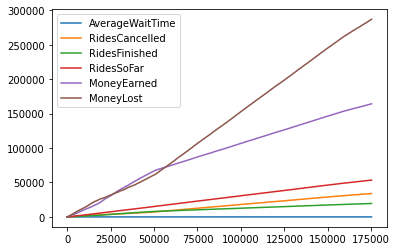

In [26]:
model_vars.plot()